# Rozkłady dyskretne
1. Rozkład dwupunktowy
2. Rozkład dwumianowy

In [2]:
import numpy as np
import matplotlib.pyplot as plt

from scipy import stats

### Zadanie
Dla rozkładu dwupunktowego i dwumianowego:
1. Zdefiniuj zmienną losową dla tego rozkładu prawdopobieństtwa.
2. Narysuj funkcję rozkładu prawdopodobieństwa.
3. Narysuj dystrybuantę.
4. Wyznacz podstawowe charakterystyki rozkładu: średnia, wariancja, odchylenie standardowe.
5. Wylosuj $n$ obserwacji z zdefiniowanego rozkładu.
6. Narysujmy histogram dla wylosowanej powyżej próbki.
7. Porównaj teoretyczną i zaaobserwowaną funkcję rozkładu prawdopobieństwa.

### Rozkład dwupunktowy - $Bern(p)$

Zmienna losowa $X$ ma **rozkład dwupunktowy** z parametrem $0 < p < 1$, jeżeli
$$
    P(X=1)=p, \quad P(X=0)=1-p.
$$

Zmienna losowa $X$ opisuje pojedyncze doświadczenie, o którym można myśleć w kategorii ,,sukces--porażka'': 
- zmienna przyjmuje wartość 1 z prawdopodobieństwem $p$, jeżeli w danym doświadczeniu zaistniał **,,sukces''**, oraz
- zmienna przyjmuje wartość 0 z prawdopodobieństwem $1-p$, jeżeli w doświadczeniu zainstniała **,,porażka''**.

https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.bernoulli.html

#### Wybrane metody

`rvs(p, loc=0, size=1)` 	Random variates.

`pmf(x, p, loc=0)` 	Probability mass function.

`cdf(x, p, loc=0)` 	Cumulative density function.

`sf(x, p, loc=0)` 	Survival function (1-cdf — sometimes more accurate).

`ppf(q, p, loc=0)` 	Percent point function (inverse of cdf — percentiles).

`stats(p, loc=0, moments=’mv’)` 	Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

`median(p, loc=0)` 	Median of the distribution.

`mean(p, loc=0)` 	Mean of the distribution.

`var(p, loc=0)` 	Variance of the distribution.

`std(p, loc=0)` 	Standard deviation of the distribution.

In [5]:
# 1. Definiujemy zmienna losową
bern = stats.bernoulli(p=0.7)
bern

In [6]:
# 2. Funkcja rozkładu prawdopodobieństwa (dla przypadku dyskretnego) = pmf = probability mass function

print(bern.pmf(0)) # P(X=0) = 1-p
print(bern.pmf(1)) # P(X=1) = p

0.30000000000000004
0.7


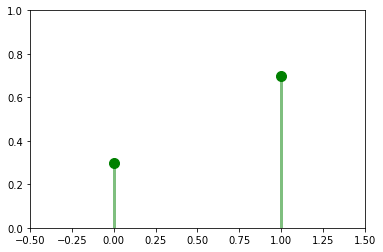

In [7]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

x_value = [0, 1]
ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

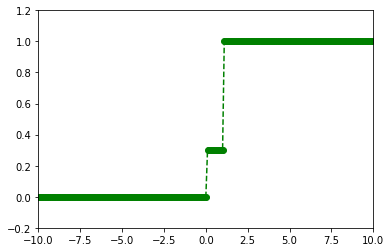

In [13]:
# 3. cdf = Cumulative density function = dystrybuanta

fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.1)
ax.plot(x, bern.cdf(x), 'go--', label='bernoulli cdf')
plt.show()

In [14]:
# 4.  Charakterystyki rozkładu
# Mean(‘m’), variance(‘v’), skew(‘s’), and/or kurtosis(‘k’).

bern.stats('mvsk')

(array(0.7), array(0.21), array(-0.87287156), array(-1.23809524))

In [16]:
# 5. możemy wylosować n(=100) wartości z tego rozkładu

x = bern.rvs(size=100)
x

array([1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1])

(array([36.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0., 64.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <a list of 10 Patch objects>)

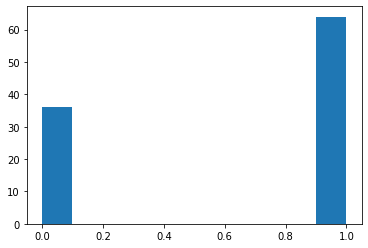

In [17]:
# 6. narysujmy histogram dla wylosowanej $n$-elementowej próbki
plt.hist(x)

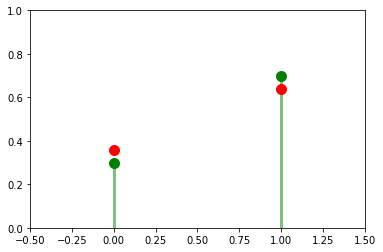

In [20]:
# 7. porównanie teoretycznej i zaobserwowanej funkcji rozkładu prawdopodobieństwa
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 1.5])
ax.set_ylim([0, 1])

unique, counts = np.unique(x, return_counts=True)
y_obs = np.array(counts/ x.size)

x_value = [0, 1]
ax.plot(x_value, bern.pmf(x_value), 'go', ms=10, label='theoretical bernoulli pmf')
ax.vlines(x_value, 0, bern.pmf(x_value), colors='g', lw=3, alpha=0.5)

ax.plot(x_value, y_obs, 'ro', ms=10, label='observed bernoulli pmf')
plt.show()


### Rozkład dwumianowy - $Bin(n, p)$
Zmienna losowa $X$ ma **rozkład dwumianowy** z parametrami $0<p<1$ oraz $n\in\mathbb{N}$, jeżeli
$$
    P(X=k)=\binom{n}{k}p^k(1-p)^{n-k} \quad \text{dla} \quad k=0,1,\ldots,n.
$$

Zmienna losowa $X$ przyjmuje wartości równe liczbie ,,sukcesów'' w~$n$~niezależnych doświadczeniach z prawdopodobieństwem sukcesu $p$ w każdym z~nich. 

W szczególności zmienną $X$ możemy przedstawić jako $$X=S_n=\sum_{i=1}^n X_i,$$ gdzie $X_i \sim \text{Bern}(p)$ oraz $(X_i)_{i=1}^n$ są wzajemnie niezależne.


https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.binom.html

In [34]:
p = 0.3 # pstwo sukcesu
n = 6 # liczba powtorzen

In [35]:
binom = stats.binom(n=n, p=p)
binom

In [32]:
# Jakie wartosic przyjmuje tak zdefiniowany rozklad?
6, 5, 4, 3, 2, 1, 0

(6, 5, 4, 3, 2, 1, 0)

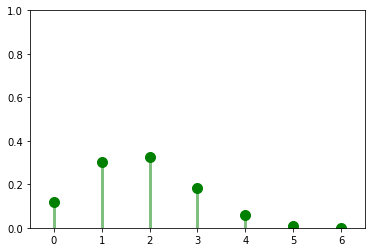

In [36]:
fig, ax = plt.subplots(1, 1)
ax.set_xlim([-.5, 6.5])
ax.set_ylim([0, 1])

x_value = np.arange(0, 7)
ax.plot(x_value, binom.pmf(x_value), 'go', ms=10, label='theoretical binomial pmf')
ax.vlines(x_value, 0, binom.pmf(x_value), colors='g', lw=3, alpha=0.5)

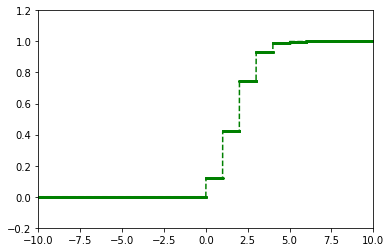

In [37]:
fig, ax = plt.subplots(1, 1)

ax.set_xlim([-10, 10])
ax.set_ylim([-0.2, 1.2])

x = np.arange(-10, 10, 0.001)
ax.plot(x, binom.cdf(x), 'go--', ms=1, label='bernoulli cdf')
plt.show()

### Zadania - dodatkowe

1. Oblicz prawdopodobieństwo $P(X=5)$, pod warunkiem, że zmienna losowa X ma rozkład dwumianowy z parametrami $n=10$ i $p=0.7$?

**Wskazówka**: $$P(X=x_0)=F(x_0)-F(x_0^-),$$gdzie $F(x_0^-)$ oznacza granicę lewostronną dystrybuanty $F$ w punkcie $x_0$.

In [38]:
binom = stats.binom(n=10, p=0.7)

In [39]:
# P(X = 5)=?
binom.pmf(5)

0.10291934520000011

2. Oblicz prawdopodobieństwo tego, że rzucając cztery razy kostką wyrzucimy trzy razy ,,trójkę''.

In [ ]:
# X_i - zdarzenie, ze w i-tym rzucie wyrzucimy 'trojke'
# P(X_i = 1) = 1/6
# X_i ~ Bern(p = 1/6)

# S_4 = X_1 + X_2 + X_3 + X_4 - zdarzenie, opisuje liczbe wyrzuconych 'trojek'
# S_4 ~ Bin(n=4, p=1/6)

In [41]:
binom2 = stats.binom(n=4, p=1/6)

In [42]:
# P(S_4 = 3)
binom2.pmf(3)

0.015432098765432093

3. Szacuje się, że aż 70% Polaków posiada kartę kredytową. Jakie jest prawdopodobieństwo, że w losowej grupie 10 osób więcej niż cztery osóby będą posiadały kartę kredytową?

**Wskazówka**: $P(X>k)=1-P(X\leq k) = 1- F(k)$.

In [ ]:
# X_i - zdarzenie, ze i-ty Polak posiada karte kredytowa
# P(X_i = 1) = 0.7
# X_i ~ Bern(p=0.7)
# S10 = X1 +..+X10
# S10 ~ Bin(n=10, p=0.7)

In [ ]:
# P(S10 > 4) = 1 - P(S10 <= 4) = 1 - F(4)

In [43]:
?stats.binom.cdf

In [44]:
1 - stats.binom.cdf(n=10, p=0.7, k=4)

0.9526510126